In [1]:
import keras
keras.__version__

'2.9.0'

# 2.1 신경망과의 첫 만남

MNIST 데이터셋 분류 실습

In [2]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

In [8]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [9]:
from keras import models
from keras import layers

In [14]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [15]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
# 훈련시작 전 데이터를 네트워크에 맞는 크기로 변경
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

In [20]:
train_images.shap

(60000, 784)

In [21]:
# 레이블을 범주형으로 인코딩
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [22]:
network.fit(train_images, train_labels, epochs=5, batch_size = 128)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.2595 - accuracy: 0.9254
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1025 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0680 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0490 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0361 - accuracy: 0.9891


In [23]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0698 - accuracy: 0.9781
test_acc: 0.9781000018119812


# 2.2 신경망을 위한 데이터 표현

## 2.2.1 스칼라(0D 텐서)

In [24]:
import numpy as np

x = np.array(12)

In [25]:
x

array(12)

In [26]:
x.ndim

0

## 2.2.2 벡터(1D 텐서)

In [27]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [29]:
x.ndim

1

이 x는 5개의 원소를 가지므로 5차원 벡터이지만, 텐서의 차원은 축을 의미하기 때문에 1D 텐서임

## 2.2.3 행렬(2D 텐서)

In [30]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x

array([[ 5, 78,  2, 34,  0],
       [ 6, 79,  3, 35,  1],
       [ 7, 80,  4, 36,  2]])

In [31]:
x.ndim

2

## 2.2.4 3D 텐서와 고차원 텐서

In [33]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

## 2.2.5 핵심속성

텐서는 3개의 핵심 속성으로 정의
- 축의 개수(랭크) : 3D 텐서에는 3개의 축이 있고, 행렬(2D 텐서)에는 2개가 존재. 넘파이 라이브러리에선 ndim 속성에 저장
- 크기(shape) : 텐서의 각 축을 따라 얼마나 많은 차원이 있는지를 나타내는 튜플
- 데이터 타입 : 넘파이에선 dtype에 저장. 

In [34]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [35]:
train_images.ndim

3

In [36]:
train_images.shape

(60000, 28, 28)

In [37]:
train_images.dtype

dtype('uint8')

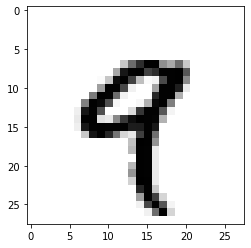

In [38]:
digit = train_images[4]

import matplotlib.pyplot as plt

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

## 2.2.7 배치 데이터

In [40]:
# 크기가 128인 배치 하나는 다음과 같이 구성
batch = train_images[:128]

In [41]:
# 그 다음 배치는 다음과 같이 구성
batch = train_images[128:256]

## 2.2.8 텐서의 실제 사례

- 벡터 데이터 : (samples, features) 크기의 2D 텐서
- 시계열 데이터 or 시퀀스 데이터 : (samples, timesteps, features) 크기의 3D 텐서
- 이미지 : (samples, height, width, channels) or (samples, channels, height, width) 크기의 4D 텐서
- 동영상 : (samples, frames, height, width, channels) or (samples, frames, channels, height, width) 크기의 5D 텐서

# 2.3 신경망의 톱니바퀴: 텐서 연산

`
keras.layers.Dense(512, activation='relu')
`
이 코드는
`
output = relu(dot(W, input) + b)
`
와 동일

## 2.3.1 원소별 연산

In [42]:
def naive_relu(x):
    assert len(x.shape) == 2   # x가 2차원인 텐서만 받기 위함
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    
    return x

In [43]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    
    return x

## 2.3.2 브로드캐스팅

크기가 다른 두 텐서가 더해질 때 일어나는 것이 브로드캐스팅(작은 텐서가 큰 텐서의 크기에 맞추어 더해짐)
1. 큰 텐서의 ndim에 맞도록 작은 텐서에 브로드캐스팅 축이 추가됨
2. 작은 텐서가 새 축을 따라서 큰 텐서의 크기에 맞도록 반복

In [44]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    
    return x

## 2.3.3 텐서 점곱

In [45]:
# 벡터와 벡터인 경우. 즉 각 원소들간의 곱의 합
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    
    z = 0
    for i in range(x.shape[0]):
        z += x[i] * y[i]
        
    return z

In [47]:
# 벡터와 행렬인 경우.
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[i]
        
    return z

In [48]:
# 행렬과 행렬인 경우.
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

# 2.4 신경망의 엔진: 그래디언트 기반 최적화

1. 훈련 샘플 x와 이에 상응하는 타깃 y의 배치를 추출
2. x를 사용하여 네트워크를 실행하고, 예측 y_pred를 구함
3. y_pred와 y의 차이를 측정하여 이 배치에 대한 네트워크의 손실을 계산
4. 배치에 대한 손실이 조금 감소되도록 네트워크의 모든 가중치를 업데이트